In [1]:
def zeta_function(eiglst, s):
    sum=0
    s = -1*s
    for n in eiglst[1:]:
        sum = sum+pow(n,s)
    return sum

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


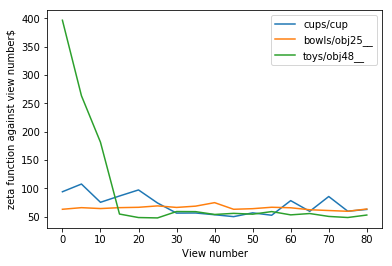

In [5]:
from matplotlib import pyplot as plt

from skimage.io import imread
from skimage.feature import corner_harris, corner_subpix, corner_peaks, peak_local_max
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import eigvalsh

folder_lst = ["cups/cup","bowls/obj25__","toys/obj48__"]
Z_val_lst =[]
for folder in folder_lst:
    image_graphs = []
    Z_vals = []
    v_num =[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
    for v in v_num:
        image = imread(folder+str(v)+".png", as_grey='True')
        points= peak_local_max(corner_harris(image), min_distance=3)
        tri = Delaunay(points)

        # create a set for edges that are indexes of the points
        edges = set()
        # for each Delaunay triangle
        for n in range(tri.nsimplex):
            # for each edge of the triangle
            # sort the vertices
            # (sorting avoids duplicated edges being added to the set)
            # and add to the edges set
            edge = sorted([tri.vertices[n,0], tri.vertices[n,1]])
            edges.add((edge[0], edge[1]))
            edge = sorted([tri.vertices[n,0], tri.vertices[n,2]])
            edges.add((edge[0], edge[1]))
            edge = sorted([tri.vertices[n,1], tri.vertices[n,2]])
            edges.add((edge[0], edge[1]))
        # make a graph based on the Delaunay triangulation edges

        graph = nx.Graph(list(edges))

        #check if graphs are connected
        if (nx.is_connected(graph) == True):
            image_graphs.append(1)

        #compute Laplacian eigenvalues
        lapeig = sorted(eigvalsh(nx.laplacian_matrix(graph).todense()))

        #compute zeta function
        Z_vals.append(zeta_function(lapeig, 1))
    print(image_graphs)
    Z_val_lst.append(Z_vals)
for zv in Z_val_lst:
    plt.plot(v_num, zv,label=folder_lst[Z_val_lst.index(zv)])
plt.xlabel('View number')
plt.ylabel('zeta function against view number$')
plt.legend()
plt.show()

In [28]:
image = imread("cups/cup_45.png", as_grey='True')

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cups/cup_45.png',0)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, color=(255,0,0))

cv2.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setBool('nonmaxSuppression',0)
kp = fast.detect(img,None)

#print "Total Keypoints without nonmaxSuppression: ", len(kp)

img3 = cv2.drawKeypoints(img, kp, color=(255,0,0))

cv2.imwrite('fast_false.png',img3)

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

In [12]:
import cv2
import numpy as np

filename = 'cups/cup_45.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,None)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

TypeError: an integer is required

In [9]:
cv2.FastFeatureDetector().detect??

Object `detect` not found.


In [ ]:
cv2.FastFeatureDetector().detect

In [ ]:
cv2.FastFeatureDetector().detector